# Used car price prediction

## Data Description

* I have scraped around 6000 used car data from cardekho.com.
* It contains 12 columns in which 11 are independent variable and the rest 1 is dependent variable.
* The given columns are:-
    1. Car_Name = Name of the given car.
    2. Price = Price of the car.
    3. Year = The year in which car was launched.
    4. Seller = Type of seller.
    5. Km_Driven = How much is kilometer the given car is driven.
    6. Owner = How much owner the car have.
    7. Fuel = Fuel type.
    8. Transmission = Type of transmission.
    9. Mileage = Mileage of the car.
    10. Engine = Power of engine in cc.
    11. Max_Power = Maximum power of the car in bhp.
    12. Seating_Capacity = Seating capacity of the car.

## Importing modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read csv file

In [2]:
df = pd.read_csv('used car dataset.csv')
df.head()

,Car_Name,Price,Year,Seller,Km_Driven,Owner,Fuel,Transmission,Mileage,Engine,Max_Power,Seating_Capacity
0,Maruti Alto Std,1.2 Lakh*,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Car_Name          5946 non-null   object
 1   Price             5946 non-null   object
 2   Year              5946 non-null   int64 
 3   Seller            5946 non-null   object
 4   Km_Driven         5946 non-null   object
 5   Owner             5946 non-null   object
 6   Fuel              5946 non-null   object
 7   Transmission      5946 non-null   object
 8   Mileage           5905 non-null   object
 9   Engine            5909 non-null   object
 10  Max_Power         5839 non-null   object
 11  Seating_Capacity  5915 non-null   object
dtypes: int64(1), object(11)
memory usage: 557.6+ KB


In [4]:
df.describe(include='all')

,Car_Name,Price,Year,Seller,Km_Driven,Owner,Fuel,Transmission,Mileage,Engine,Max_Power,Seating_Capacity
count,5946,5946,5946.000000,5946,5946,5946,5946,5946,5905,5909,5839,5915
unique,1997,749,NaN,3,1578,1,5,2,453,134,378,8
top,Maruti Swift Dzire VDI,4.5 Lakh*,NaN,Dealer,"50,000 kms",First Owner,Diesel,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power74 bhp,Seats5
freq,66,137,NaN,3513,233,5946,2994,4713,162,791,268,4878
mean,NaN,NaN,2014.513454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.158430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1997.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

### Checking for null values

<AxesSubplot:>

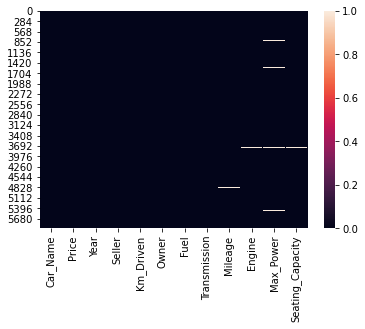

In [5]:
sns.heatmap(df.isnull())

As we can see here, the columns mileage, engine, max_power, seating_capacity has the null values. Let's see in detail.

In [6]:
df.isnull().sum()

Car_Name              0
Price                 0
Year                  0
Seller                0
Km_Driven             0
Owner                 0
Fuel                  0
Transmission          0
Mileage              41
Engine               37
Max_Power           107
Seating_Capacity     31
dtype: int64

Now we can see that the total number of null values present in each column.

### Treating null values

In [7]:
# the column max_power contain maximum number of null values
# we can remove the null values.
df.dropna(subset=['Mileage', 'Engine', 'Max_Power', 'Seating_Capacity'], inplace=True)

In [8]:
df.isnull().sum()

Car_Name            0
Price               0
Year                0
Seller              0
Km_Driven           0
Owner               0
Fuel                0
Transmission        0
Mileage             0
Engine              0
Max_Power           0
Seating_Capacity    0
dtype: int64

### Independent variable

In [9]:
# the column car_name is not important, so have to drop that column.
df.drop('Car_Name', axis=1, inplace=True)

In [10]:
# the column km_driven contain the string value kms in it, we have to remove that.
df['Km_Driven'] = df['Km_Driven'].map(lambda x: str(x)[:-4])

In [11]:
# in mileage column also we only want the numerical value
df['Mileage'] = df['Mileage'].map(lambda x: str(x)[7:-6])

In [12]:
# in engine column also we only need the numerical value
df['Engine'] = df['Engine'].map(lambda x: str(x)[6:-2])

In [13]:
# in max_power column also we need only numerical column
df['Max_Power'] = df['Max_Power'].map(lambda x: str(x)[9:-4])

In [14]:
# in seating capacity also we need only numerical column
df['Seating_Capacity'] = df['Seating_Capacity'].map(lambda x: str(x)[5:])

In [16]:
df.head()

,Price,Year,Seller,Km_Driven,Owner,Fuel,Transmission,Mileage,Engine,Max_Power,Seating_Capacity
0,1.2 Lakh*,2012,Individual,"1,20,000",First Owner,Petrol,Manual,19.,796,46.3,5
1,5.5 Lakh*,2016,Individual,"20,000",First Owner,Petrol,Manual,18.,1197,82,5
2,2.15 Lakh*,2010,Individual,"60,000",First Owner,Petrol,Manual,17.,1197,80,5
3,2.26 Lakh*,2012,Individual,"37,000",First Owner,Petrol,Manual,20.9,998,67.1,5
4,5.7 Lakh*,2015,Dealer,"30,000",First Owner,Diesel,Manual,22.7,1498,98.59,5


### independent variable

In [17]:
# in price column we have suffix(lakhs*), in place of this we have to give the total figure
df['Price'] = df['Price'].map(lambda x: str(x)[:-6])

In [18]:
df.Price = df.Price.astype('float64')

In [19]:
df['Price'] = df['Price'].apply(lambda x: x*100000)

In [20]:
df.Price = df.Price.astype('int64')

In [21]:
df.head()

,Price,Year,Seller,Km_Driven,Owner,Fuel,Transmission,Mileage,Engine,Max_Power,Seating_Capacity
0,120000,2012,Individual,"1,20,000",First Owner,Petrol,Manual,19.,796,46.3,5
1,550000,2016,Individual,"20,000",First Owner,Petrol,Manual,18.,1197,82,5
2,215000,2010,Individual,"60,000",First Owner,Petrol,Manual,17.,1197,80,5
3,225999,2012,Individual,"37,000",First Owner,Petrol,Manual,20.9,998,67.1,5
4,570000,2015,Dealer,"30,000",First Owner,Diesel,Manual,22.7,1498,98.59,5


In [22]:
# As we can see in the dataset, there is a comma in the value of km_driven column.
df['Km_Driven'] = df['Km_Driven'].apply(lambda x: x.replace(',',''))

In [23]:
df.head()

,Price,Year,Seller,Km_Driven,Owner,Fuel,Transmission,Mileage,Engine,Max_Power,Seating_Capacity
0,120000,2012,Individual,120000,First Owner,Petrol,Manual,19.,796,46.3,5
1,550000,2016,Individual,20000,First Owner,Petrol,Manual,18.,1197,82,5
2,215000,2010,Individual,60000,First Owner,Petrol,Manual,17.,1197,80,5
3,225999,2012,Individual,37000,First Owner,Petrol,Manual,20.9,998,67.1,5
4,570000,2015,Dealer,30000,First Owner,Diesel,Manual,22.7,1498,98.59,5


## EDA

<AxesSubplot:xlabel='Price'>

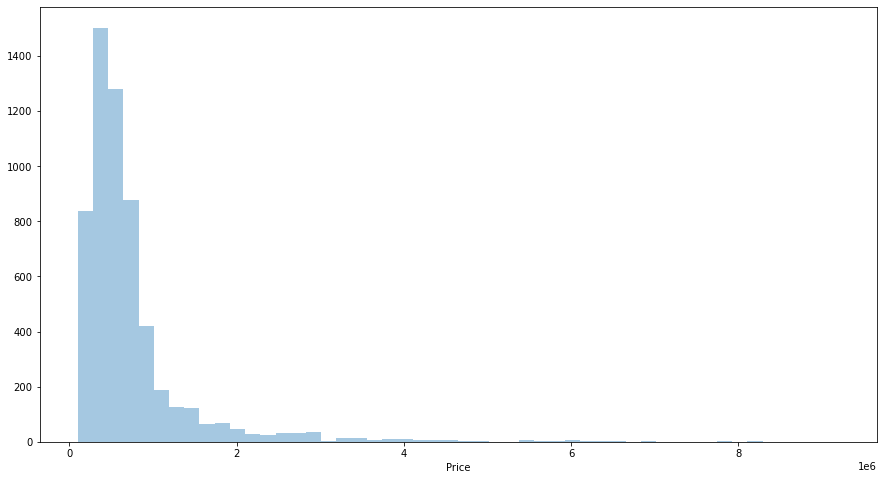

In [24]:
# first let's have a look of our target column
plt.subplots(figsize=(15,8))
sns.distplot(df['Price'], kde=False)

we can see here that around 1400 car has the price in between 500,000.

<AxesSubplot:xlabel='Price', ylabel='Density'>

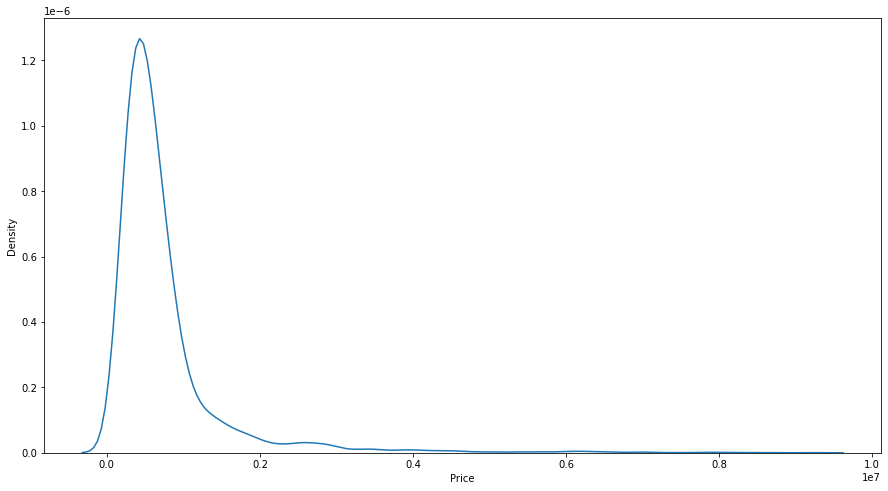

In [25]:
plt.subplots(figsize=(15,8))
sns.distplot(df['Price'], hist=False)

<AxesSubplot:xlabel='Fuel', ylabel='Price'>

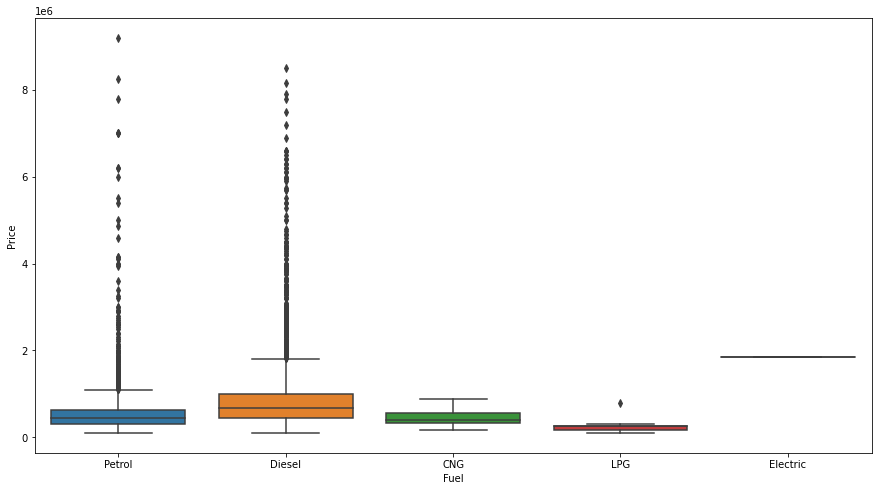

In [26]:
# comparision of type of fuel used in a car with respect to its price.
plt.subplots(figsize=(15,8))
sns.boxplot(x=df['Fuel'], y=df['Price'])

As, we thought diseal car would cost followed Petrol.

<AxesSubplot:xlabel='Year', ylabel='Price'>

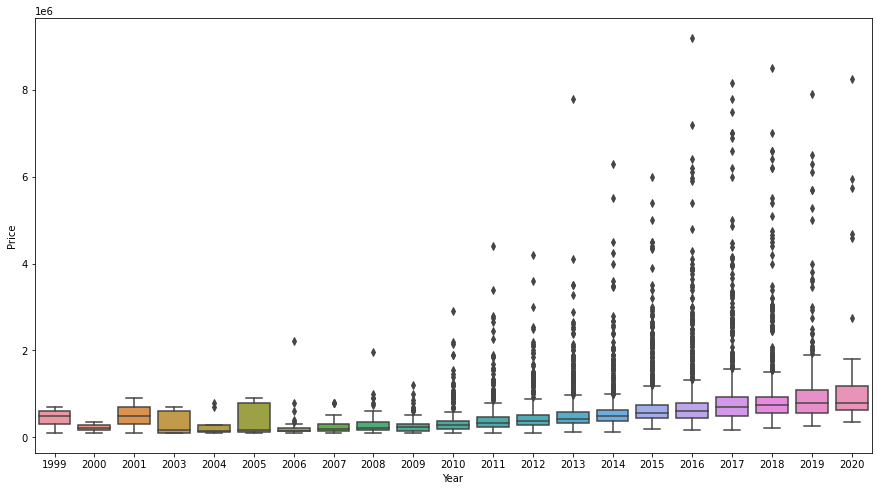

In [27]:
# comparision of year with respect to its price.
plt.subplots(figsize=(15,8))
sns.boxplot(x=df['Year'], y=df['Price'])

Clearly, it's a strong tendency.

Price of Newest is high compared to old models.

<AxesSubplot:xlabel='Seller', ylabel='Price'>

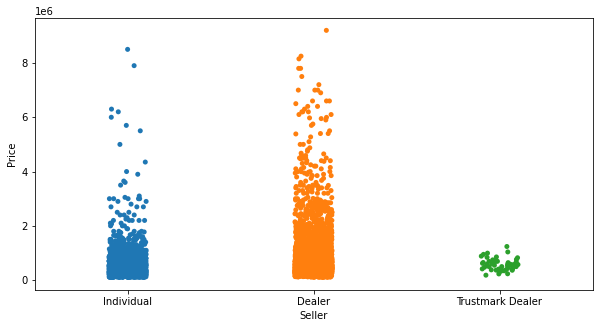

In [28]:
# comparision of type of dealer with rescpect to the price of car
plt.subplots(figsize=(10,5))
sns.stripplot(x=df['Seller'], y=df['Price'])

The price given by dealer seller in high as compared to others.

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

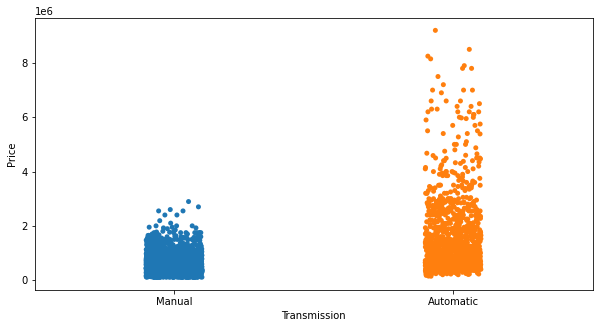

In [29]:
# comparision of type of tansmission with respect to the price of the car
plt.subplots(figsize=(10,5))
sns.stripplot(x=df['Transmission'], y=df['Price'])

The automatic transmission type cars are more costly than manual transmission type.

In [30]:
df['Owner'].unique()

array(['First Owner'], dtype=object)

## Working with ctegorical data

As for now we have left with only 4 categorical features:

    1.Seller
    2.Fuel
    3.Transmission
    4.Owner

For handeling categorical data. We mostly use these 2 technique:

    1.OneHotEncoder
    2.LabelEncoder

Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

So, for each Features we will use plots to find out what to be used there.

#### Working for seller column

In [31]:
df['Seller'].value_counts()

Dealer              3434
Individual          2327
Trustmark Dealer      51
Name: Seller, dtype: int64

We will be using One-hot-encoding here

In [32]:
Seller = df['Seller']
Seller = pd.get_dummies(Seller)
Seller.head()

,Dealer,Individual,Trustmark Dealer
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


#### Woking for fuel column

In [33]:
df['Fuel'].value_counts()

Diesel      2924
Petrol      2755
CNG          115
LPG           17
Electric       1
Name: Fuel, dtype: int64

In [34]:
Fuel = df['Fuel']
Fuel = pd.get_dummies(Fuel)
Fuel.head()

,CNG,Diesel,Electric,LPG,Petrol
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0


#### Working with transmission

In [35]:
df['Transmission'].value_counts()

Manual       4611
Automatic    1201
Name: Transmission, dtype: int64

In [36]:
Transmission = df['Transmission']
Transmission = pd.get_dummies(Transmission)
Transmission.head()

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


#### Working with Owner

In [37]:
df['Owner'].value_counts()

First Owner    5812
Name: Owner, dtype: int64

As we can see here the owner column contain only a single value. we should better delete it

In [38]:
df.drop('Owner', axis=1, inplace=True)

As we have converted our all categorical data.So now we will delete that column and concat the converted column.

In [39]:
# deleting the column which we don't require
df.drop(['Transmission', 'Fuel', 'Seller'], axis=1, inplace=True)

In [40]:
# Now we concat the converted column
final_df= pd.concat([df,Seller,Fuel,Transmission],axis=1)
final_df.head()

,Price,Year,Km_Driven,Mileage,Engine,Max_Power,Seating_Capacity,Dealer,Individual,Trustmark Dealer,CNG,Diesel,Electric,LPG,Petrol,Automatic,Manual
0,120000,2012,120000,19.,796,46.3,5,0,1,0,0,0,0,0,1,0,1
1,550000,2016,20000,18.,1197,82,5,0,1,0,0,0,0,0,1,0,1
2,215000,2010,60000,17.,1197,80,5,0,1,0,0,0,0,0,1,0,1
3,225999,2012,37000,20.9,998,67.1,5,0,1,0,0,0,0,0,1,0,1
4,570000,2015,30000,22.7,1498,98.59,5,1,0,0,0,1,0,0,0,0,1


## Model Development

In [41]:
x = final_df.drop('Price', axis=1)
y = final_df['Price']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

R2: 0.6696897868815199
MAE: 252369.55476074282
MSE: 190317205725.36508
RMSE: 436253.6025356869


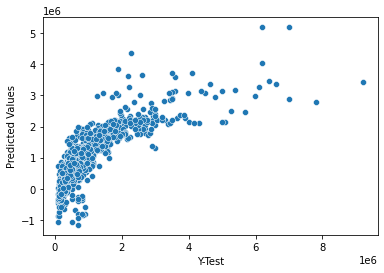

In [49]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
sns.scatterplot(y_test,predlr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")
print('R2: {}'.format(metrics.r2_score(y_test, predlr)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predlr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predlr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predlr))))

R Square: 0.7863913298853191
MAE: 155162.3652329749
MSE: 123076440268.45535
RMSE: 350822.51961419947


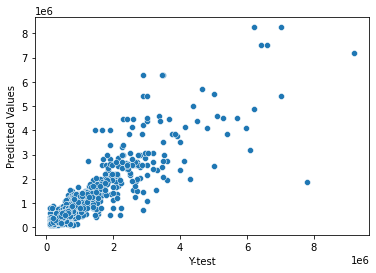

In [50]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
preddtr = dtr.predict(x_test)
sns.scatterplot(y_test, preddtr)
plt.xlabel('Y-test')
plt.ylabel('Predicted Values')
print('R Square: {}'.format(metrics.r2_score(y_test, preddtr)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, preddtr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, preddtr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, preddtr))))

R Square: 0.8596842455190059
MAE: 119464.93887656597
MSE: 80846735134.07361
RMSE: 284335.6030012309


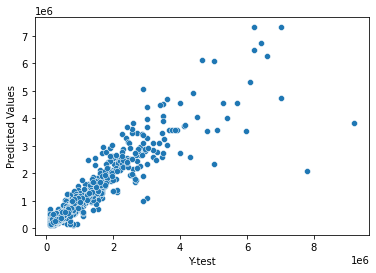

In [51]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
sns.scatterplot(y_test, predrfr)
plt.xlabel('Y-test')
plt.ylabel('Predicted Values')
print('R Square: {}'.format(metrics.r2_score(y_test, predrfr)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predrfr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predrfr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predrfr))))

R Square: 0.6656081911658694
MAE: 252233.4556629146
MSE: 192668928017.47775
RMSE: 438940.68849615403


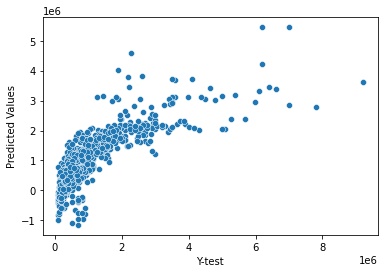

In [52]:
en = ElasticNet() 
en.fit(x_train, y_train)
preden = en.predict(x_test)
sns.scatterplot(y_test, preden)
plt.xlabel('Y-test')
plt.ylabel('Predicted Values')
print('R Square: {}'.format(metrics.r2_score(y_test, preden)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, preden)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, preden)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, preden))))

R Square: 0.6015773180196289
MAE: 382546.0224383545
MSE: 229562055669.50317
RMSE: 479126.3462485685


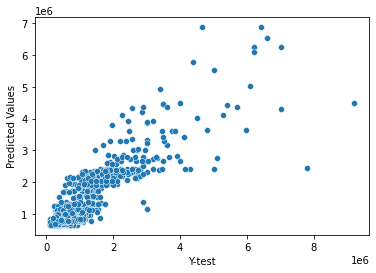

In [53]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
predada = ada.predict(x_test)
sns.scatterplot(y_test, predada)
plt.xlabel('Y-test')
plt.ylabel('Predicted Values')
print('R Square: {}'.format(metrics.r2_score(y_test, predada)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predada)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predada)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predada))))

Here we can see that our RandomForestRegressor performs well as it has the most lowest metric scores among all the three model and higher r2_score

### Performing cross validation

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
scr = cross_val_score(lr, x, y, cv=5, scoring='r2')
print("Cross validation score for Linear Regression:", scr.mean())

Cross validation score for Linear Regression: 0.6640629718209934


In [58]:
scr = cross_val_score(dtr, x, y, cv=5, scoring='r2')
print("Cross validation score for Decision Tree Regressor:", scr.mean())

Cross validation score for Decision Tree Regressor: 0.8240760653056514


In [59]:
scr = cross_val_score(rfr, x, y, cv=5, scoring='r2')
print("Cross validation score for Random Forest Regressor:", scr.mean())

Cross validation score for Random Forest Regressor: 0.8859533099201489


In [60]:
scr = cross_val_score(en, x, y, cv=5, scoring='r2')
print("Cross validation score for Random Forest Regressor:", scr.mean())

Cross validation score for Random Forest Regressor: 0.6597024947048588


In [61]:
scr = cross_val_score(ada, x, y, cv=5, scoring='r2')
print("Cross validation score for Random Forest Regressor:", scr.mean())

Cross validation score for Random Forest Regressor: 0.6992207817767278


In cross validation our Random Forest Regressor performs well, so we will select RandomForestRegressor for HyperParameter Tuning.

### Hyperparameter tuning

In [62]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, num = 6)]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
GCV = GridSearchCV(RandomForestRegressor(), random_grid, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 8, 11, 14, 17, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [100, 136, 172, 209, 245, 281, 318,
                                          354, 390, 427, 463, 500]})

In [65]:
GCV.best_params_

{'max_depth': 14,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 318}

In [66]:
rfrGCV = RandomForestRegressor(max_depth=14, max_features='auto', min_samples_leaf=1, n_estimators=318)
rfrGCV.fit(x_train, y_train)
predGCV = rfrGCV.predict(x_test)
print('R square:', metrics.r2_score(y_test, predGCV))

R square: 0.8628274386802265


### Checking how much our predictions are correct 

In [67]:
prediction = pd.DataFrame({"Predictions":predGCV, "Real Value":y_test})

In [68]:
prediction.round(2)

,Predictions,Real Value
5674,1547474.74,1500000
4199,798785.87,799000
3564,697233.81,755000
868,378952.34,350000
5800,2701738.19,3300000
...,...,...
4446,259152.48,250000
4553,576959.85,565000
4657,960514.70,1000000
181,1254228.07,1275000
